### Exploratory Data Analysis

In [1]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hmhas = pd.read_sas(filepath_or_buffer='dataset/H_MHAS_c.sas7bdat')

In [3]:
hmhas

,codent01,codent03,ps3,ent2,np,unhhidnp,rahhidnp,tipent_01,tipent_03,tipent_12,...,s4satlife,s5satlife,r3satlifez,r4satlifez,r5satlifez,s3satlifez,s4satlifez,s5satlifez,r2cantril,s2cantril
0,1.0,1.0,1.0,1.0,10.0,110.0,b'110',12.0,12.0,1.0,...,NaN,NaN,1.510731,NaN,NaN,1.510731,NaN,NaN,1.0,NaN
1,2.0,2.0,2.0,2.0,20.0,120.0,b'120',11.0,11.0,1.0,...,NaN,NaN,1.510731,-0.387025,-0.393398,1.510731,NaN,NaN,NaN,1.0
2,1.0,1.0,1.0,1.0,10.0,210.0,b'210',11.0,22.0,1.0,...,NaN,NaN,-0.397267,-0.387025,-0.393398,NaN,NaN,NaN,NaN,5.0
3,2.0,2.0,2.0,2.0,20.0,220.0,b'220',12.0,11.0,3.0,...,1.0,NaN,NaN,NaN,NaN,-0.397267,-0.387025,NaN,5.0,NaN
4,1.0,1.0,1.0,1.0,10.0,310.0,b'310',11.0,11.0,1.0,...,1.0,1.0,-0.397267,-0.387025,-0.393398,-0.397267,-0.387025,-0.393398,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,NaN,NaN,NaN,NaN,10.0,2021610.0,b'2021610',NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.393398,NaN,NaN,NaN,NaN,NaN
26835,NaN,NaN,NaN,NaN,20.0,2021620.0,b'2021620',NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.393398,NaN,NaN,NaN,NaN,NaN
26836,NaN,NaN,NaN,NaN,10.0,2021710.0,b'2021710',NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.393398,NaN,NaN,NaN,NaN,NaN
26837,NaN,NaN,NaN,NaN,10.0,2021810.0,b'2021810',NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.393398,NaN,NaN,NaN,NaN,NaN


      Total  Percentage
np                     
10.0  16428   61.209434
11.0    228    0.849510
12.0      4    0.014904
13.0      5    0.018630
14.0    105    0.391222
15.0      2    0.007452
20.0   9979   37.180968
21.0     53    0.197474
22.0      1    0.003726
24.0     30    0.111778
34.0      2    0.007452
40.0      1    0.003726
44.0      1    0.003726


<AxesSubplot: xlabel='Total', ylabel='Percentage'>

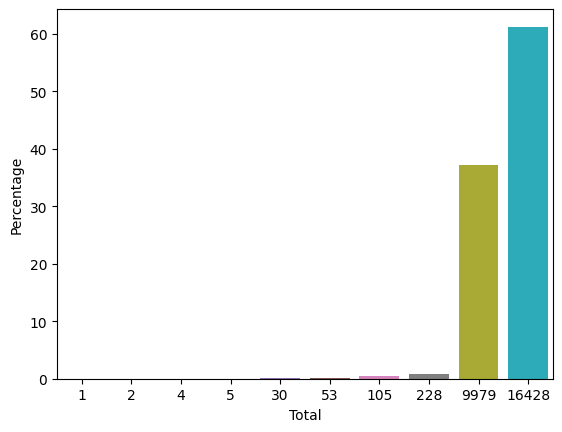

In [4]:
# Show distribution of target variable 

df = hmhas.reset_index().groupby(['np']).size().to_frame('Total')

df['Percentage'] = df['Total'].div(df['Total'].sum()).mul(100)

print(df)

sns.barplot(x='Total', y='Percentage', data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

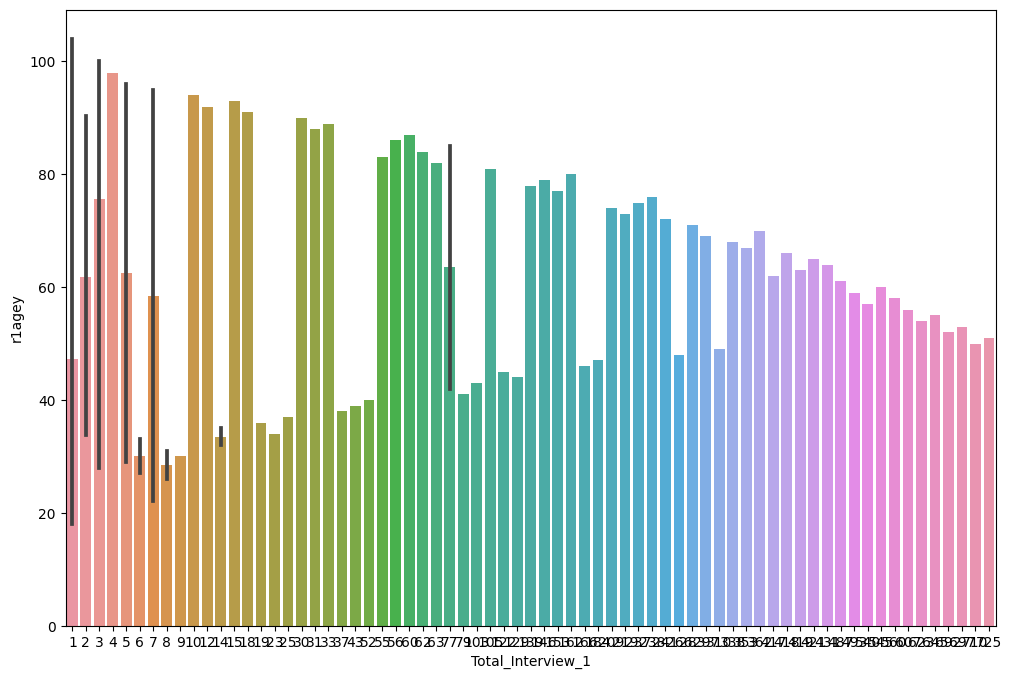

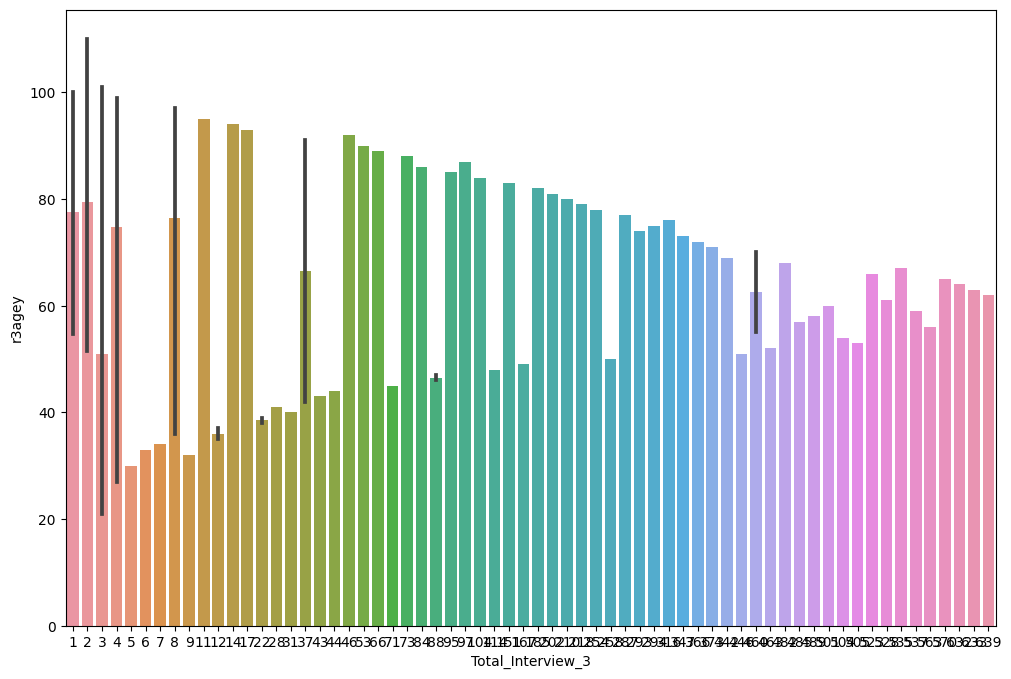

In [19]:
# Use MatPlotLib to Plot For Example = Age at Interview For Wave 1.

df = hmhas.groupby(['r1agey']).size().to_frame('Total_Interview_1').reset_index('r1agey')

plt.figure(figsize=(12,8))

ax =sns.barplot(x='Total_Interview_1', y='r1agey', data=df)

plt.show

# Use MatPlotLib to Plot For Example = Age at Interview For Wave 3.

df = hmhas.groupby(['r3agey']).size().to_frame('Total_Interview_3').reset_index('r3agey')

plt.figure(figsize=(12,8))

ax =sns.barplot(x='Total_Interview_3', y='r3agey', data=df)

plt.show


         Total  Percentage
h1rural                   
0.0      11225   41.823466
1.0       3961   14.758374


<AxesSubplot: xlabel='Total', ylabel='Percentage'>

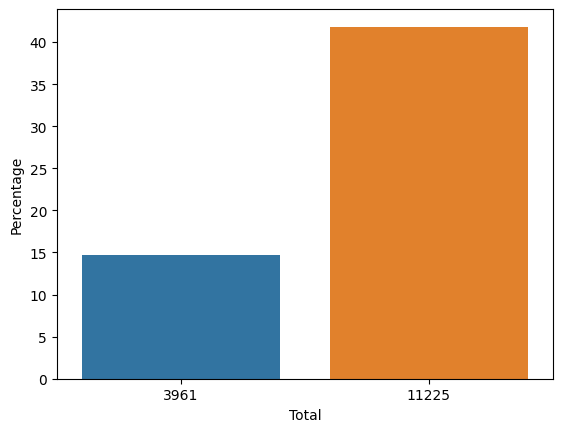

In [26]:
### Residence Plot If Rural = 0 or Urban = 1 To Understand Conditions

df = hmhas.reset_index().groupby(['h1rural']).size().to_frame('Total')

df['Percentage'] = (df['Total']/len(hmhas))*100

df1 = df.sort_values(by='Percentage', ascending=False)

print(df1)

sns.barplot(x='Total', y='Percentage', data=df)


   r1shlt  TotRepHealth
0     1.0           271
1     2.0           627
2     3.0          4495
3     4.0          6585
4     5.0          2169


<AxesSubplot: xlabel='TotRepHealth', ylabel='r1shlt'>

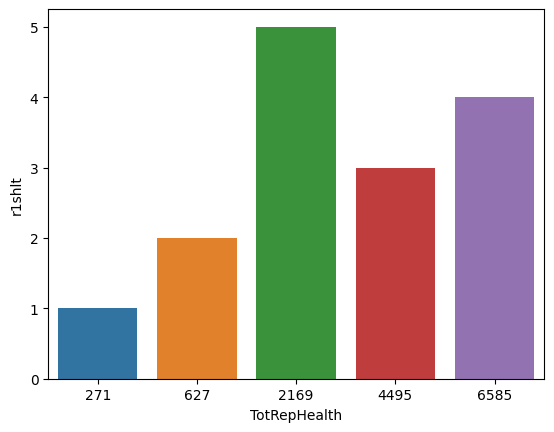

In [28]:
### Self-Report of Health 
# | 1.Excellent| 2.Very good | 3.Good | 4.Fair | 5.Poor

df = hmhas.groupby(['r1shlt']).size().to_frame('TotRepHealth').reset_index('r1shlt')

print(df)

sns.barplot(x='TotRepHealth', y='r1shlt', data=df)


   r1walkra  TotDifToWalk
0       0.0         14182
1       1.0           784


<AxesSubplot: xlabel='TotDifToWalk', ylabel='r1walkra'>

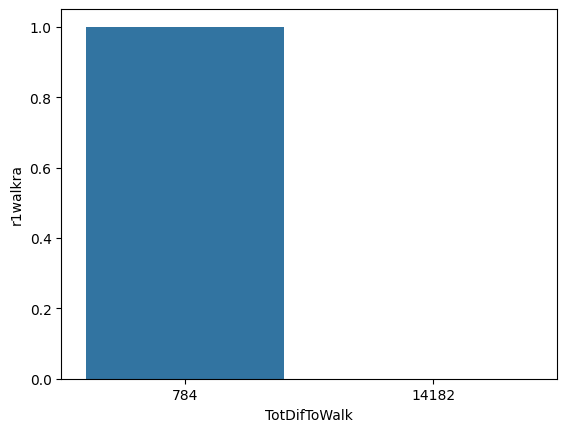

In [29]:
### Plot Of Activities of Daily Living - Difficulty-Walking across room

#  0 = No | 1 = Yes

df = hmhas.groupby(['r1walkra']).size().to_frame('TotDifToWalk').reset_index('r1walkra')

print(df)

sns.barplot(x='r1walkra', y='TotDifToWalk', data=df)


In [36]:
import pickle

In [61]:
df = hmhas

from sklearn.model_selection import train_test_split

X=df.drop(labels=['np'], axis=1)
y=df['np']

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    random_state=42, shuffle=True)

In [ ]:
#Using Pearson Correlation
corrmat = X_train.corr(numeric_only=True) 
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
#            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.7)
len(set(corr_features))

In [ ]:
# Remove the non correlation data
X_train = X_train.drop(corr_features,axis=1)

In [ ]:
# Save correlation data as a pickle file if needed
with open('dataset/corr_features.csv', 'wb') as f:
   pickle.dump(X_train, f)

In [62]:
# Load the correlation data as pickle file if needed
with open('dataset/corr_features.csv', 'rb') as f:
   X_train = pickle.load(f)

In [63]:
# Now, with the Correlation Data...
# Find the Features For Categorical

onehot_features = X_train.select_dtypes(include=["object"]).nunique() > 2
onehot_columns = onehot_features[onehot_features].index.tolist()

In [64]:
onehot_columns

['rahhidnp', 'h1hhidc', 'h2hhidc', 'h3hhidc', 'h4hhidc', 'h5hhidc', 'acthog']

In [65]:
# Removing Categorical
# Only Impute Numerical Because the Categorical and Ordinal in this case don't matter
# and make the data to big

n_train_df = X_train.drop(onehot_columns,axis=1)

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute values for all columns with missing data
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(n_train_df)

n_train_df = imp_mean.transform(n_train_df)

# Scaling all Numerical features

scaler = StandardScaler()
scaler = scaler.fit(n_train_df)

t_train_df = scaler.transform(n_train_df)


In [69]:
t_train_df

array([[-6.09761309e-16,  1.59422869e+00,  0.00000000e+00, ...,
         1.32508026e-15,  7.65954550e-16,  0.00000000e+00],
       [-9.94235187e-01,  6.22955612e-02, -2.30569812e-02, ...,
         1.32508026e-15,  9.36462952e-01, -1.09577250e+00],
       [-9.94235187e-01,  6.08609990e-02,  4.48748037e+00, ...,
         1.32508026e-15,  9.36462952e-01,  4.29730529e-01],
       ...,
       [ 1.75188562e+00, -4.60943077e-01, -5.24227798e-01, ...,
        -2.26029418e+00,  9.36462952e-01, -5.87271492e-01],
       [-9.94235187e-01, -3.37947299e-01, -2.30569812e-02, ...,
         7.23521302e-01, -2.51308968e+00, -7.87704813e-02],
       [-9.94235187e-01, -1.34662386e+00, -5.24227798e-01, ...,
         7.23521302e-01,  9.36462952e-01, -5.87271492e-01]])

In [153]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a PCA object with X components
pca = PCA(n_components=1368, svd_solver='full')

# Preprocess all the data
# Create a pipeline with PCA

pipe = Pipeline(
    steps=[('pca', pca),]
)

# Fit the pipeline to your data and transform it
reduced_data = pipe.fit_transform(t_train_df)

In [154]:
reduced_data

array([[  1.79926583,   0.36750279,  -1.03606187, ...,  -0.23543263,
         -0.20498471,   0.16726739],
       [ -6.92355383,   3.09184894,  -2.73173793, ...,  -0.1312668 ,
         -0.3033577 ,   0.77131719],
       [ -1.21108947,  -1.99749697,   2.7193297 , ...,   0.8097387 ,
         -1.10148411,  -0.17415651],
       ...,
       [  2.51391219, -11.18235687,  -2.44188253, ...,  -0.06016992,
         -0.65442294,  -0.81086844],
       [ -4.46038466,   3.44666217,   2.65089228, ...,  -1.45388011,
          1.18340686,  -1.24689873],
       [  1.34242099,  14.93081364,   7.72470925, ...,  -1.64605497,
         -0.57030208,   0.0153937 ]])

In [155]:
reduced_data.shape

(21471, 1368)

In [156]:
%%time

# This is an example code on how to:
#   - Create and fit (train) a logistic regression
#   - Assign to `log_reg` variable
log_reg = None
log_reg = LogisticRegression(C=0.01, solver="liblinear")
log_reg.fit(reduced_data, y_train)


CPU times: total: 1min 32s
Wall time: 1min 40s


LogisticRegression(C=0.01, solver='liblinear')

In [157]:
log_reg_train = log_reg.predict_proba(reduced_data)

In [158]:
log_reg_train.shape

(21471, 13)

In [159]:
roc_auc_train = roc_auc_score(y_true=y_train, y_score=log_reg_train, multi_class='ovr')

print(f"Train ROC AUC Score: {roc_auc_train:.4f}") 

Train ROC AUC Score: 0.9314
